## Prácticas Naive Bayes y KNN (ejercicio 2)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### **2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.**

#### 3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

#### 4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.

#### 5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.

#### author: Virginia Ordoño Bernier - date: december 2023


#### 1. Carga datos

In [4]:
import pandas as pd
import numpy as np

df_classes = pd.read_csv("data/data2.csv")
df_classes.head()

,Feature_1,Feature_2,Label
0,0.496714,0.000000,0.0
1,0.647689,1.523030,0.0
2,0.000000,0.000000,0.0
3,1.579213,0.767435,0.0
4,0.000000,0.542560,0.0


In [6]:
df_classes.rename(columns={'Feature_1': 'class_1', 'Feature_2': 'class_2', 'Label': 'target'}, inplace=True)
df_classes['target'] = df_classes['target'].astype(int)
df_classes.head()

,class_1,class_2,target
0,0.496714,0.000000,0
1,0.647689,1.523030,0
2,0.000000,0.000000,0
3,1.579213,0.767435,0
4,0.000000,0.542560,0


#### 2. Preprocesamiento de datos

In [8]:
from sklearn.model_selection import train_test_split

# División el conjunto de datos en train y test en un porcentaje de 2/3 vs 1/3
TEST_SIZE = 0.33
train, test = train_test_split(df_classes, test_size= TEST_SIZE)
train.reset_index(inplace = True)
test.reset_index(inplace = True)
train.head()

,index,class_1,class_2,target
0,140,0.113517,0.662131,0
1,457,0.000000,0.279022,0
2,904,1.418809,3.895038,1
3,825,3.579633,3.325796,1
4,964,4.100960,4.958347,1


### 3. Clasificación con Naive Bayes

- Calcula las probabilidades de cada factor o características según cada clase. La clase con más probabildidad, será la ganadora.
- Asume que las características son estadísticamente independientes.
- Funciona bien con clasificaciones sencillas.

##### 3.1. Tipos de distribución según clasificadores 

- *Gaussian Naive Bayes*. Variables de entradas características numéricas continuas.
- *Multinomial Naive Bayes*. Datos que provienen de recuentos.
- *Complement Naive Bayes*. Extensión del Multinomial. Clasificación no balanceada, se usa cuando una de las clases se produce de manera mucho más frecuente que las demás.
- *Bernouilli Naive Bayes*. Con datos binarios.
- *Categorical Naive Bayes*. Si todas las variables con categóricas

##### 3.2. Selección del método 

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
import matplotlib.pyplot as plt

X_train = train[['class_1', 'class_2']]
y_train = train['target']
X_test = test[['class_1', 'class_2']]
y_test = test['target']

classifiers = [GaussianNB(), BernoulliNB(), MultinomialNB(), ComplementNB(), CategoricalNB()]

for clf_value in (classifiers):
    clf_value.fit(X_train, y_train)
    y_pred = clf_value .predict(X_test)    

    # Mostrar el informe de clasificación
    print(f"\nInforme de clasificación: {clf_value}")
    print(classification_report(y_test, y_pred, target_names=['class_1', 'class_2']))


Informe de clasificación: GaussianNB()
              precision    recall  f1-score   support

     class_1       1.00      0.98      0.99       269
     class_2       0.92      1.00      0.96        61

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.98       330
weighted avg       0.99      0.98      0.99       330


Informe de clasificación: BernoulliNB()
              precision    recall  f1-score   support

     class_1       0.82      1.00      0.90       269
     class_2       0.00      0.00      0.00        61

    accuracy                           0.82       330
   macro avg       0.41      0.50      0.45       330
weighted avg       0.66      0.82      0.73       330


Informe de clasificación: MultinomialNB()
              precision    recall  f1-score   support

     class_1       0.82      1.00      0.90       269
     class_2       0.00      0.00      0.00        61

    accuracy                           0.82       330
   m

c:\Users\Virginia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Virginia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Virginia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

##### 3.3. Evaluación del método seleccionado con la Matriz de Confusión 

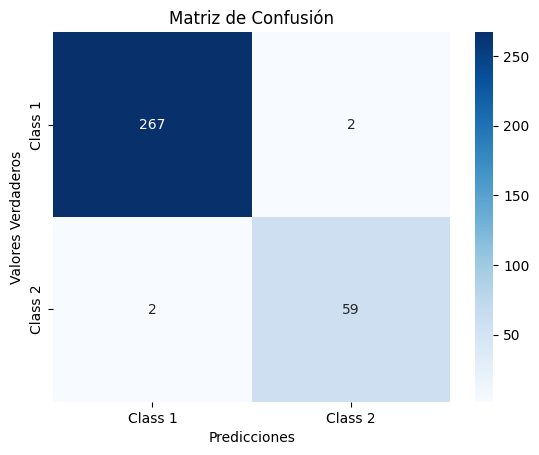

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
cm = np.round(confusion_matrix(y_test, y_pred))
cm

classes = ('Class 1', 'Class 2')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Resultados
# Verdaderos Positivos (TP): 267
# Falsos Positivos (FP): 2 
# Falsos Negativos (FN): 2 
# Verdaderos Negativos (TN): 59